In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests
import matplotlib.ticker as mticker

In [2]:
start_date = "2020-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

In [3]:
DUCInventory='duc-data.csv'
DUCInventory_df=pd.read_csv(DUCInventory, header=[1]) #header=[0,1]
DUCInventory_df=pd.read_csv(DUCInventory, header=[2])
# DUCInventory_df=DUCInventory_df.columns.droplevel(5)
DUCInventory_df.columns = ['Date','Anadarko_Drilled','Anadarko_Completed','Anadarko_DUC','Unnamed: 4','Appalachia_Drilled','Appalachia_Completed','Appalachia_DUC','Unnamed: 8','Bakken_Drilled','Bakken_Completed','Bakken_DUC','Unnamed: 12','Eagle Ford_Drilled','Eagle Ford_Completed', 'Eagle Ford_DUC', 'Unnamed: 16','Haynesville_Drilled','Haynesville_Completed','Haynesville_DUC', 'Unnamed: 20', 'Niobrara_Drilled','Niobrara_Completed', 'Niobrara_DUC','Unnamed: 24','Permian_Drilled','Permian_Completed', 'Permian_DUC','Unnamed: 28', 'DPR_Drilled','DPR_Completed','DPR_DUC']

del DUCInventory_df['Unnamed: 4']
del DUCInventory_df['Unnamed: 8']
del DUCInventory_df['Unnamed: 12']
del DUCInventory_df['Unnamed: 16']
del DUCInventory_df['Unnamed: 20']
del DUCInventory_df['Unnamed: 24']
del DUCInventory_df['Unnamed: 28']

DUCInventory_df=DUCInventory_df.iloc[2:81, ]
DUCInventory_df.tail(5)

,Date,Anadarko_Drilled,Anadarko_Completed,Anadarko_DUC,Appalachia_Drilled,Appalachia_Completed,Appalachia_DUC,Bakken_Drilled,Bakken_Completed,Bakken_DUC,...,Haynesville_DUC,Niobrara_Drilled,Niobrara_Completed,Niobrara_DUC,Permian_Drilled,Permian_Completed,Permian_DUC,DPR_Drilled,DPR_Completed,DPR_DUC
76,Mar-20,58,105,756,84,100,605,95,103,876,...,290,144,141,488,462,442,"3,404","1,085","1,100","7,657"
77,Apr-20,30,58,728,82,87,600,69,59,886,...,291,79,81,486,332,309,"3,427",745,730,"7,672"
78,May-20,13,29,712,61,76,585,33,30,889,...,292,35,40,481,200,195,"3,432",416,466,"7,622"
79,Jun-20,10,17,705,59,70,574,20,13,896,...,293,23,21,483,149,101,"3,480",324,291,"7,655"
80,Jul-20,9,15,699,57,63,568,19,13,902,...,294,16,15,484,138,98,"3,520",292,262,"7,685"


In [4]:
#access the first column
# data.iloc[:, <column_number>]
DUCInventory_df.iloc[:,0].dtypes
DUCInventory_df.tail(25)

,Date,Anadarko_Drilled,Anadarko_Completed,Anadarko_DUC,Appalachia_Drilled,Appalachia_Completed,Appalachia_DUC,Bakken_Drilled,Bakken_Completed,Bakken_DUC,...,Haynesville_DUC,Niobrara_Drilled,Niobrara_Completed,Niobrara_DUC,Permian_Drilled,Permian_Completed,Permian_DUC,DPR_Drilled,DPR_Completed,DPR_DUC
56,Jul-18,211,156,879,115,139,697,135,155,781,...,181,174,185,538,558,470,"2,412","1,458","1,326","6,568"
57,Aug-18,170,148,901,98,130,665,109,138,752,...,188,171,176,533,568,512,"2,468","1,345","1,355","6,558"
58,Sep-18,195,154,942,104,120,649,109,122,739,...,194,168,156,545,589,489,"2,568","1,401","1,270","6,689"
59,Oct-18,192,152,982,123,121,651,121,118,742,...,194,198,177,566,599,443,"2,724","1,498","1,249","6,938"
60,Nov-18,189,133,"1,038",106,83,674,111,99,754,...,201,159,142,583,568,463,"2,829","1,404","1,153","7,189"
61,Dec-18,172,115,"1,095",109,80,703,109,70,793,...,207,175,135,623,538,416,"2,951","1,345","1,000","7,534"
62,Jan-19,166,122,"1,139",120,101,722,121,71,843,...,218,198,128,693,585,469,"3,067","1,464","1,104","7,894"
63,Feb-19,144,121,"1,162",115,110,727,109,56,896,...,219,151,145,699,551,452,"3,166","1,329","1,088","8,135"
64,Mar-19,127,159,"1,130",137,114,750,112,110,898,...,230,180,167,712,578,500,"3,244","1,392","1,302","8,225"
65,Apr-19,137,154,"1,113",125,130,745,119,115,902,...,235,154,169,697,576,454,"3,366","1,369","1,252","8,342"


In [5]:
#if have a date format like Jan-14 for the month and year:
#then you can use pd.to_datetime(df['column'], format=%b-%y)
DUCInventory_df['Date'] = pd.to_datetime(DUCInventory_df["Date"], format='%b-%y') #.dt.time
DUCInventory_df['Date']

2    2014-01-01
3    2014-02-01
4    2014-03-01
5    2014-04-01
6    2014-05-01
        ...    
76   2020-03-01
77   2020-04-01
78   2020-05-01
79   2020-06-01
80   2020-07-01
Name: Date, Length: 79, dtype: datetime64[ns]

In [6]:
# DUCInventory_date_df = pd.DataFrame(DUCInventory_date_df)

In [7]:
DUCInventory_date_df = DUCInventory_df[(DUCInventory_df['Date']> start_date) & (DUCInventory_df['Date']< end_date)]

In [8]:
# The dtype of the NumPy record array for the field date is datetime64[D] 
# which means it is a 64-bit np.datetime64 in 'day' units. 
# While this format is more portable, 
# Matplotlib cannot plot this format natively yet. 
# We can plot this data by changing the dates to datetime.date 
# instances instead, which can be achieved by converting to an object array
DUCInventory_date_df

,Date,Anadarko_Drilled,Anadarko_Completed,Anadarko_DUC,Appalachia_Drilled,Appalachia_Completed,Appalachia_DUC,Bakken_Drilled,Bakken_Completed,Bakken_DUC,...,Haynesville_DUC,Niobrara_Drilled,Niobrara_Completed,Niobrara_DUC,Permian_Drilled,Permian_Completed,Permian_DUC,DPR_Drilled,DPR_Completed,DPR_DUC
75,2020-02-01,55,110,803,79,103,621,95,91,884,...,290,137,145,485,465,443,"3,384","1,057","1,115","7,672"
76,2020-03-01,58,105,756,84,100,605,95,103,876,...,290,144,141,488,462,442,"3,404","1,085","1,100","7,657"
77,2020-04-01,30,58,728,82,87,600,69,59,886,...,291,79,81,486,332,309,"3,427",745,730,"7,672"
78,2020-05-01,13,29,712,61,76,585,33,30,889,...,292,35,40,481,200,195,"3,432",416,466,"7,622"
79,2020-06-01,10,17,705,59,70,574,20,13,896,...,293,23,21,483,149,101,"3,480",324,291,"7,655"
80,2020-07-01,9,15,699,57,63,568,19,13,902,...,294,16,15,484,138,98,"3,520",292,262,"7,685"


AttributeError: 'NoneType' object has no attribute 'set_yticks'

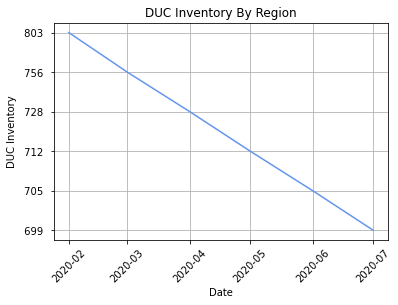

In [19]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
# plot just crude prices on one graph
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Anadarko_DUC'], color='CornflowerBlue')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("DUC Inventory By Region")
ax.grid()

# plt.yticks(rotation=90)
#to change the number of ticks, np.arrange(start,stop, step)
# y_ticks = np.arange(1600, 4000, 10)
# plt.yticks(y_ticks)



ax = plt.gca().invert_yaxis()

# ymin, ymax = ax.get_ylim()
# custom_ticks = np.linspace(ymin, ymax, 10, dtype=int)
# ax.set_yticks(custom_ticks)
# ax.set_yticklabels(custom_ticks)
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))


# ylims = ax1.get_ylim()
# ymajorlocator = FixedLocator(ylims)
# ax.yaxis.set_major_locator(ymajorlocator)
# ax.yaxis.set_minor_locator(LinearLocator(10))
# ymajorformatter = FormatStrFormatter('%.2f')
# ax.yaxis.set_major_formatter(ymajorformatter)


ylims = ax1.get_ylim()
ax.set_yticks(ylims)



# ax.get_xaxis().get_major_formatter().set_useOffset(False)


# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Permian')
plt.legend(handles=[blue_line])
plt.savefig("DUC Inventory.png", bbox_inches='tight')
plt.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Anadarko_DUC'])
# plt.show()

In [10]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('DUC Inventory')
ax1.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Permian_DUC'], color='g')
# ax1.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['DPR_DUC'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
_=plt.yticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("DUC Inventory")
ax1.grid(False)

y=DUCInventory_date_df['Permian_DUC']
y_ticks = np.arange(0, 100, 10)
plt.yticks(y_ticks)
# ax1.set_ylim([0, 80])
# ax1.set_yscale('linear')
ax1.grid()

values = range(20)

# ax2=ax1.twinx()
# ax2.set_ylabel('DUC Inventory')
# ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Gasoline Storage'], color='orange')
# ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Permian DUC Inventory')
orange_line = mlines.Line2D([], [], color='blue', label='Total DUCs')
plt.legend(handles=[green_line], loc='upper left')

ax1.plot(values)
plt.savefig("DUC_Inventory.png", bbox_inches='tight')
plt.close()

ValueError: view limit minimum -36880.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36880.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [ ]:
DUCInventory_date_df['Anadarko_DUC'][10]

In [ ]:
DUCInventory_df['Date'][10]

In [ ]:
# fig =plt.subplots(figsize=(12,8))
# barWidth=0.25

# # labels =  np.arange(2015,2020)
# labels=[DUCInventory_df['Date'][80]]



# # Anadarko=plt.bar(labels,DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
# # Appalachia= plt.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
# # Bakken= plt.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
# # EagleFord= plt.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
# # Haynesville=plt.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
# # Niobrara=plt.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
# # Permian=plt.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)



# # bp_dict = plt.bar(labels, list(map(float, scores[0])), align='edge', width=-0.4)
# # bp_dict = plt.bar(labels, list(map(float, scores[1])), align='edge', width=0.4)


# # ax1=plot.subplot()
# ax1.bar(labels,DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
# ax1.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)
# ax1.xaxis_date()
# ax1.autoscale(tight=True)

# # ax = plt.subplot(111)
# # ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# # ax.bar(x, z, width=0.2, color='g', align='center')
# # ax.bar(x+0.2, k, width=0.2, color='r', align='center')
# # ax.xaxis_date()







# # ax1.set_ylabel('Scores')
# # ax1.set_xticks(width)
# ax1.set_xticklabels( '2011-Jan-6' )


# plt.xlabel('Basins', fontweight='bold')
# plt.ylabel('DUC Inventory', fontweight='bold')
# plt.title ("DUC Inventory By Shale Play", fontweight='bold')
# # plt.grid()
# # plt.legend(loc='upper right')
# # plt.legend(fontsize="12", title="Shale Plays")
# # lgnd.legendHandles[0]._sizes = [60]
# # lgnd.legendHandles[1]._sizes = [60]
# # lgnd.legendHandles[2]._sizes = [60]
# # lgnd.get_title().set_fontsize(12)


# plt.style.use('fivethirtyeight')
# plt.show()


In [ ]:
# def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
#     """Draws a bar plot with multiple bars per data point.

#     Parameters
#     ----------
#     ax : matplotlib.pyplot.axis
#         The axis we want to draw our plot on.

#     data: dictionary
#         A dictionary containing the data we want to plot. Keys are the names of the
#         data, the items is a list of the values.

#         Example:
#         data = {
#             "x":[1,2,3],
#             "y":[1,2,3],
#             "z":[1,2,3],
#         }

#     colors : array-like, optional
#         A list of colors which are used for the bars. If None, the colors
#         will be the standard matplotlib color cyle. (default: None)

#     total_width : float, optional, default: 0.8
#         The width of a bar group. 0.8 means that 80% of the x-axis is covered
#         by bars and 20% will be spaces between the bars.

#     single_width: float, optional, default: 1
#         The relative width of a single bar within a group. 1 means the bars
#         will touch eachother within a group, values less than 1 will make
#         these bars thinner.

#     legend: bool, optional, default: True
#         If this is set to true, a legend will be added to the axis.
#     """

#     # Check if colors where provided, otherwhise use the default color cycle
#     if colors is None:
#         colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#     # Number of bars per group
#     n_bars = len(data)

#     # The width of a single bar
#     bar_width = total_width / n_bars

#     # List containing handles for the drawn bars, used for the legend
#     bars = []

#     # Iterate over all data
#     for i, (name, values) in enumerate(data.items()):
#         # The offset in x direction of that bar
#         x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

#         # Draw a bar for every value of that type
#         for x, y in enumerate(values):
#             bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

#         # Add a handle to the last drawn bar, which we'll need for the legend
#         bars.append(bar[0])

#     # Draw legend if we need
#     if legend:
#         ax.legend(bars, data.keys())

        
# # Anadarko=plt.bar(labels,DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
# # Appalachia= plt.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
# # Bakken= plt.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
# # EagleFord= plt.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
# # Haynesville=plt.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
# # Niobrara=plt.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
# # Permian=plt.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)      
        

# #     plt.xticks(range(5), ["one", "two", "three", "four", "five"])
        
        
    

# if __name__ == "__main__":
#     # Usage example:
#     data = {
#         DUCInventory_date_df['Anadarko_DUC'][80],
#         DUCInventory_date_df['Appalachia_DUC'][80],
#         DUCInventory_date_df['Bakken_DUC'][80],
#         DUCInventory_date_df['Eagle Ford_DUC'][80],
#         DUCInventory_date_df['Haynesville_DUC'][80],
#         DUCInventory_date_df['Niobrara_DUC'][80],
#         DUCInventory_date_df['Permian_DUC'][80],
#     }

#     fig, ax = plt.subplots()
#     bar_plot(ax, data, total_width=.8, single_width=.9)
#     plt.show()